In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD  # example files
from pmda import rms
import distributed
import warnings
from matplotlib import pyplot as plt

# Suppress some MDAnalysis warnings about PSF files
warnings.filterwarnings('ignore')

# Initialize the Dask cluster
lc = distributed.LocalCluster(n_workers=8, processes=True)
client = distributed.Client(lc)
client

/Users/klaudiuszrydzy/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:61865/status,
Dashboard: http://127.0.0.1:61865/status,Workers: 8
Total threads: 8,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61866,Workers: 8
Dashboard: http://127.0.0.1:61865/status,Total threads: 8
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:61888,Total threads: 1
Dashboard: http://127.0.0.1:61894/status,Memory: 1.00 GiB
Nanny: tcp://127.0.0.1:61869,


/Users/klaudiuszrydzy/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


[[0.00000000e+00 9.99999912e-01 1.12000016e-06]
 [1.00000000e+00 1.99999982e+00 6.93046763e-01]
 [2.00000000e+00 2.99999974e+00 8.74367188e-01]
 [3.00000000e+00 3.99999965e+00 1.05112588e+00]
 [4.00000000e+00 4.99999956e+00 1.15381534e+00]
 [5.00000000e+00 5.99999947e+00 1.25233186e+00]
 [6.00000000e+00 6.99999938e+00 1.33944963e+00]
 [7.00000000e+00 7.99999930e+00 1.43189321e+00]
 [8.00000000e+00 8.99999921e+00 1.53676432e+00]
 [9.00000000e+00 9.99999912e+00 1.62457612e+00]
 [1.00000000e+01 1.09999990e+01 1.70989502e+00]
 [1.10000000e+01 1.19999989e+01 1.81921663e+00]
 [1.20000000e+01 1.29999989e+01 1.91153110e+00]
 [1.30000000e+01 1.39999988e+01 1.98107232e+00]
 [1.40000000e+01 1.49999987e+01 2.07695536e+00]
 [1.50000000e+01 1.59999986e+01 2.15844769e+00]
 [1.60000000e+01 1.69999985e+01 2.22989526e+00]
 [1.70000000e+01 1.79999984e+01 2.27595185e+00]
 [1.80000000e+01 1.89999983e+01 2.39654215e+00]
 [1.90000000e+01 1.99999982e+01 2.45294790e+00]
 [2.00000000e+01 2.09999982e+01 2.567006

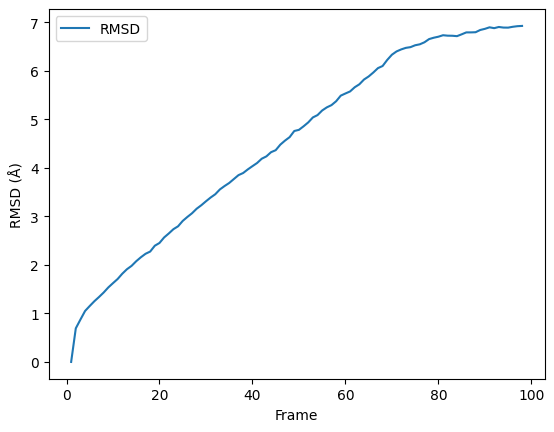

CPU times: user 550 ms, sys: 81.4 ms, total: 631 ms
Wall time: 820 ms


In [3]:
%%time
# Load the example data
u = mda.Universe(PSF, DCD)
ref = mda.Universe(PSF, DCD)  # use the same trajectory as a reference

# Run the RMSD analysis
rmsd_ana = rms.RMSD(u.atoms, ref.atoms).run()

# Print and plot results
print(rmsd_ana.rmsd)
plt.plot(rmsd_ana.rmsd.T[1], rmsd_ana.rmsd.T[2], label='RMSD')
plt.xlabel('Frame')
plt.ylabel('RMSD (Å)')
plt.legend()
plt.show()